1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
预测类别: 篮球


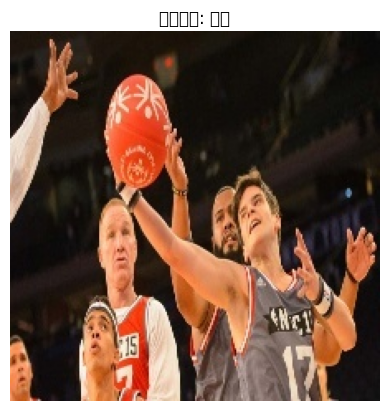

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# 加载已训练好的模型
model = tf.keras.models.load_model('sports_classification_model.h5')

# 创建一个 ImageDataGenerator 来处理新的图像
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# 加载和预处理新的图片
def preprocess_image(image_path, target_size=(150, 150)):
    # 加载图片并调整大小
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)  # 将图片转换为数组
    img_array = np.expand_dims(img_array, axis=0)  # 增加批次维度
    img_array = test_datagen.standardize(img_array)  # 进行标准化
    return img_array

# 导入新的图片
image_path = 'D:\\machine study\\01.jpg'  # 替换为新图片路径
image_array = preprocess_image(image_path)

# 使用模型进行预测
prediction = model.predict(image_array)

# 获取预测类别
predicted_class = np.argmax(prediction[0])

# 定义类别标签
class_labels = ["气悬球", "射箭", "平衡木", "马术", "棒球", "篮球", "台球", "保龄球", "蹦极", "漂流", 
                "体操", "槌球", "冰壶", "击剑", "男子花样滑冰", "女子花样滑冰", "足球", "高尔夫", "跳高", "标枪", 
                "台球", "气悬球", "棒球"]

# 根据预测类别获取实际标签
predicted_class_name = class_labels[predicted_class]
print(f"预测类别: {predicted_class_name}")

# 显示图片
img = load_img(image_path)  # 重新加载图像用于显示
plt.imshow(img)
plt.title(f"预测类别: {predicted_class_name}")
plt.axis('off')
plt.show()